In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('clustered_data.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Cluster
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,1
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,1
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,1
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,1
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,1
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,2
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,2
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,2


In [2]:
df['Cluster'].value_counts()

Cluster
1    6613
0    1953
2    1561
Name: count, dtype: int64

# Profile Each Cluster
- Analyze Cluster Characteristics: For each cluster, analyze the central tendencies (mean, median) of behaviors and attributes that indicate preferences, such as transaction amounts, product holdings, or engagement metrics.
- Identify Cluster Preferences: Determine which card categories are most aligned with the characteristics of each cluster. For example, a cluster with high average credit limits and transaction amounts might have a preference for premium card categories.


In [3]:
Cluster0 = df[df['Cluster']==0]
Cluster1 = df[df['Cluster']==1]
Cluster2 = df[df['Cluster']==2]

In [4]:
columns_of_interest = ['Customer_Age', 'Dependent_count', 'Months_on_book',
                       'Total_Relationship_Count', 'Months_Inactive_12_mon',
                       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

### How to Interpret These Results:
**Customer Age, Dependent Count, Months on Book**: These will give you demographic and account age insights. Differences across clusters can indicate varying preferences based on lifecycle stage or family size.

**Total Relationship Count, Months Inactive, Contacts Count**: Metrics on engagement and product holdings. Higher numbers (especially in Total Relationship Count) might indicate a stronger relationship with the bank, while higher inactivity or contact counts could signal issues or specific needs.

**Credit Limit, Total Revolving Bal, Avg Open To Buy**: These financial metrics can help infer spending power and credit usage patterns, indicating potential preferences for certain card features or limits.

**Total Amt Chng, Total Trans Amt, Total Trans Ct, Total Ct Chng, Avg Utilization Ratio**: These transactional behaviors are key to understanding how customers use their cards and their overall engagement with banking services.

In [5]:
# For Mean
mean_values = df.groupby('Cluster')[columns_of_interest].mean()

# For Median
median_values = df.groupby('Cluster')[columns_of_interest].median()

print("Mean Values by Cluster:")
print(mean_values)

print("\nMedian Values by Cluster:")
print(median_values)

Mean Values by Cluster:
         Customer_Age  Dependent_count  Months_on_book  \
Cluster                                                  
0           46.077829         2.536610       35.734767   
1           46.317708         2.279601       35.916830   
2           46.671365         2.390135       36.219731   

         Total_Relationship_Count  Months_Inactive_12_mon  \
Cluster                                                     
0                        3.537634                2.264209   
1                        4.018146                2.278845   
2                        3.285714                2.701473   

         Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Cluster                                                             
0                     2.382488  23538.002048          1201.081925   
1                     2.352336   4592.543914          1269.229094   
2                     2.982703   7095.185266           664.121076   

         Avg_Open_To_Buy  Total_A

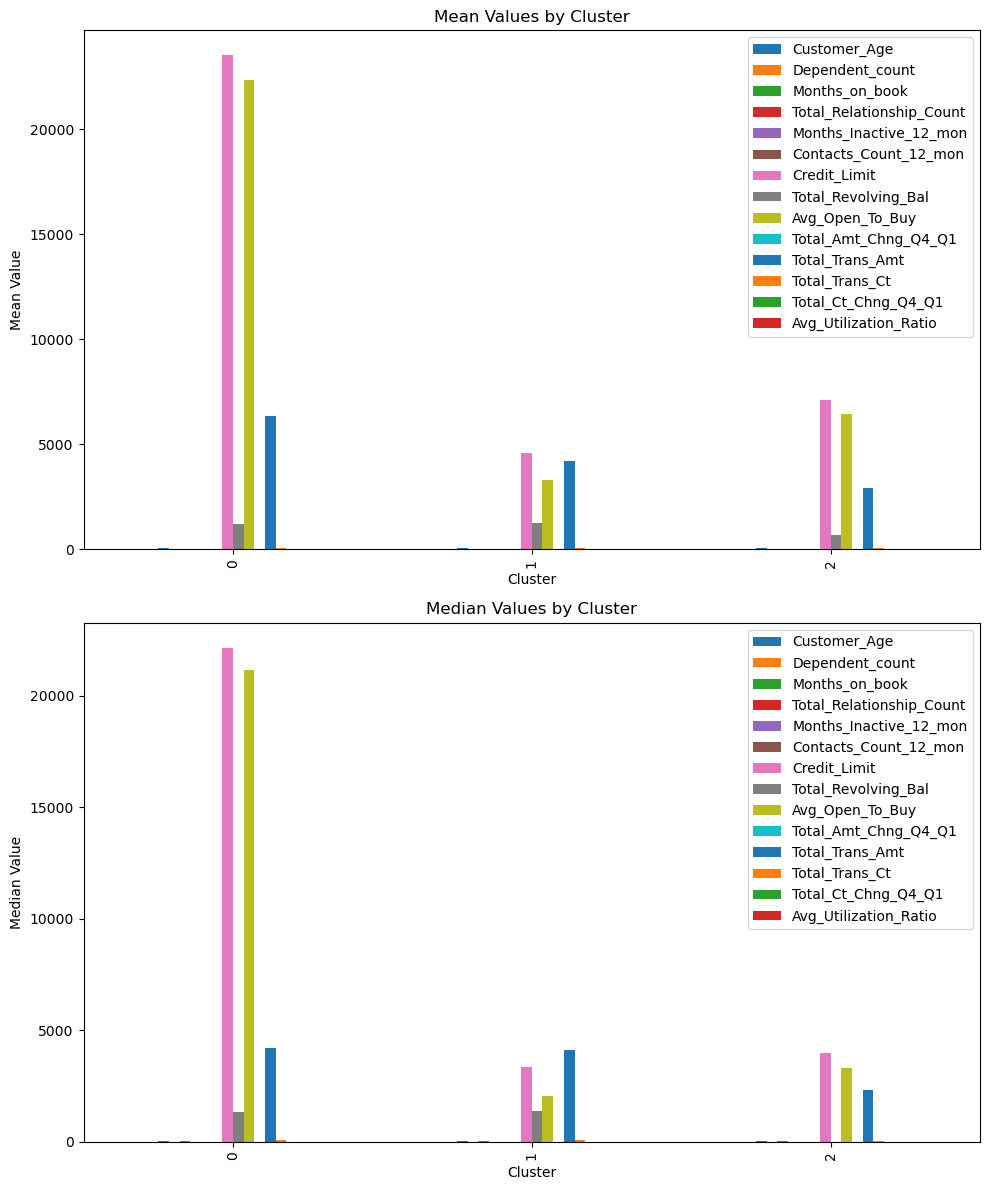

In [6]:
# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot for mean values
mean_values.plot(kind='bar', ax=axes[0], title="Mean Values by Cluster")
axes[0].set_ylabel("Mean Value")
axes[0].set_xlabel("Cluster")

# Plot for median values
median_values.plot(kind='bar', ax=axes[1], title="Median Values by Cluster")
axes[1].set_ylabel("Median Value")
axes[1].set_xlabel("Cluster")

plt.tight_layout()
plt.show()

Find differences across groups: (differentiate from each other)
- **big: 'Credit_Limit', 'Avg_Open_To_Buy'**
- **small: 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio'**

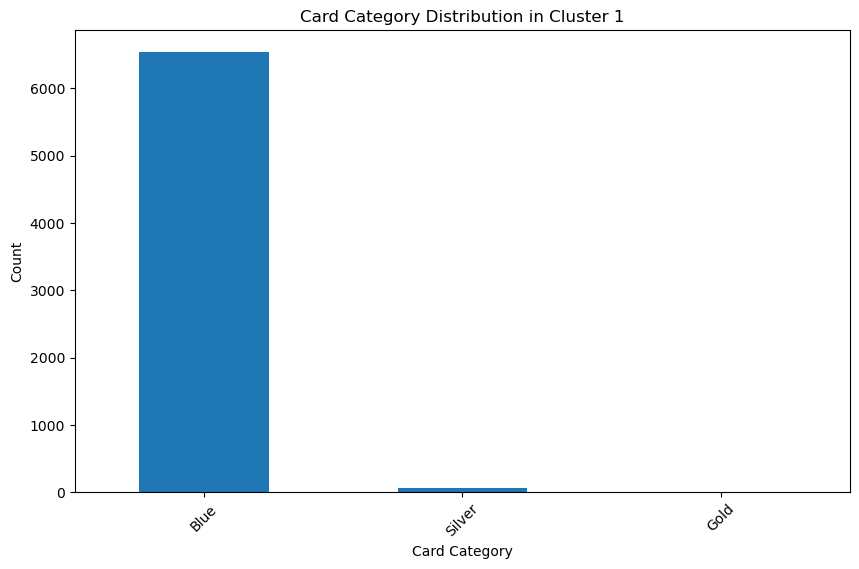

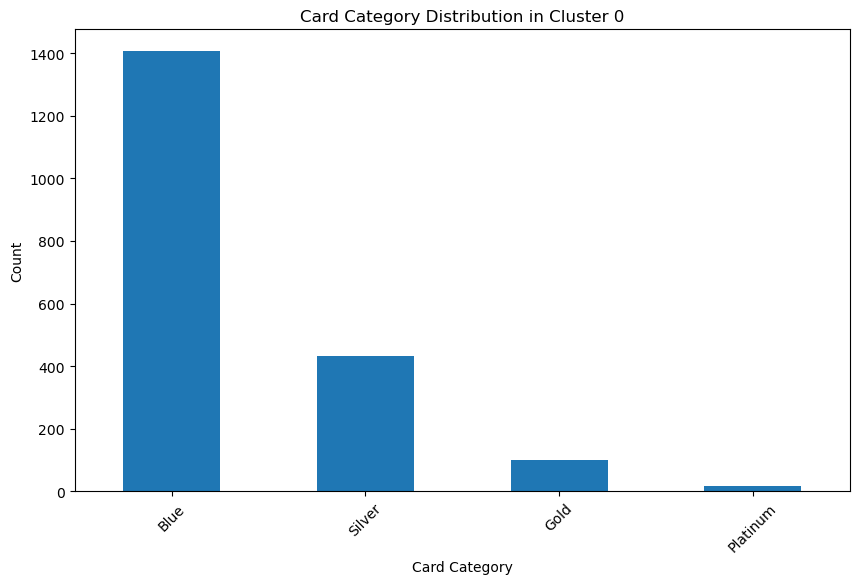

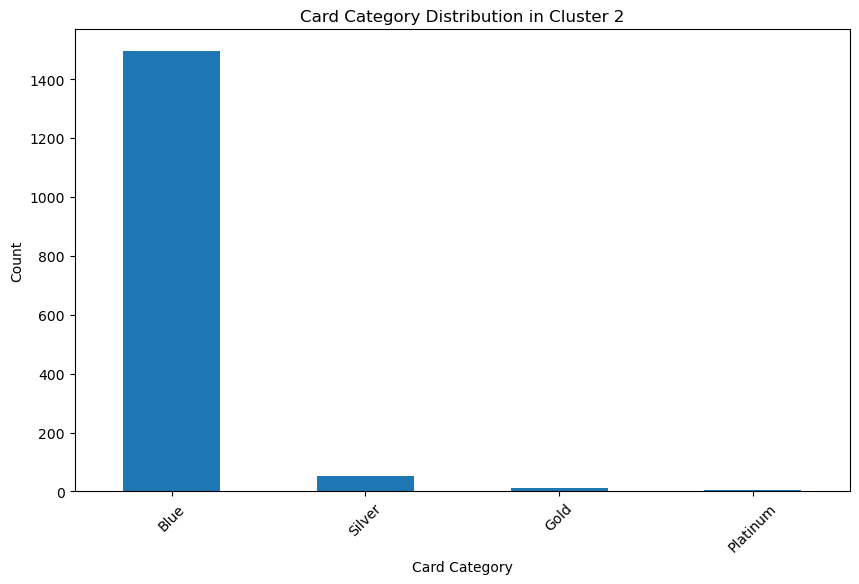

In [7]:
clusters = df['Cluster'].unique()

# Create a plot for each cluster's Card_Category value counts
for cluster in clusters:
    # Filter the DataFrame by cluster
    cluster_data = df[df['Cluster'] == cluster]
    
    # Get the value counts of the 'Card_Category' column
    card_category_counts = cluster_data['Card_Category'].value_counts()
    
    # Plot the value counts
    plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
    card_category_counts.plot(kind='bar')
    plt.title(f'Card Category Distribution in Cluster {cluster}')
    plt.xlabel('Card Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45) # Rotate the x-axis labels for better readability
    plt.show()

Roughly, cluster 1 and 2 is almost Blue Category, but cluster 0 has mixed of four types.

# Derive Implicit Ratings
Map Preferences to Ratings: Convert the cluster preferences into implicit ratings. This can be done in several ways, depending on the level of granularity and the nature of your data. For example:
Binary Ratings: If a cluster shows a preference for a certain card category, all members of that cluster could be given a binary rating (e.g., 1 for preferred card categories, 0 for others).
Scaled Ratings: Assign ratings on a scale (e.g., 1-5) based on the degree of alignment between cluster characteristics and card category features. Clusters with a strong preference for premium cards might receive higher ratings for those cards.

In [8]:
# mapping
def map_cluster_preferences_to_ratings(df):
    # Calculate mean values for each cluster
    cluster_means = df.groupby('Cluster')[columns_of_interest].mean()
    
    # Initialize a DataFrame to hold ratings
    ratings = pd.DataFrame(index=cluster_means.index, columns=['Premium_Rating', 'Rewards_Rating'])
    
    # Define thresholds or logic to convert means to ratings
    for cluster in cluster_means.index:
        # Premium Rating Logic: a higher credit limit within a cluster leads to a higher rating.
        if cluster_means.loc[cluster, 'Credit_Limit'] > np.percentile(cluster_means['Credit_Limit'], 90):
            ratings.loc[cluster, 'Premium_Rating'] = 5  # High rating for high credit limit
        elif cluster_means.loc[cluster, 'Credit_Limit'] > np.percentile(cluster_means['Credit_Limit'], 70):
            ratings.loc[cluster, 'Premium_Rating'] = 4
        elif cluster_means.loc[cluster, 'Credit_Limit'] > np.percentile(cluster_means['Credit_Limit'], 50):
            ratings.loc[cluster, 'Premium_Rating'] = 3
        else:
            ratings.loc[cluster, 'Premium_Rating'] = 2  
            
        # Rewards Rating Logic
        if cluster_means.loc[cluster, 'Avg_Open_To_Buy'] > np.percentile(cluster_means['Avg_Open_To_Buy'], 90):
            ratings.loc[cluster, 'Rewards_Rating'] = 5  # High rating for high transaction count
        elif cluster_means.loc[cluster, 'Avg_Open_To_Buy'] > np.percentile(cluster_means['Avg_Open_To_Buy'], 70):
            ratings.loc[cluster, 'Rewards_Rating'] = 4
        elif cluster_means.loc[cluster, 'Avg_Open_To_Buy'] > np.percentile(cluster_means['Avg_Open_To_Buy'], 50):
            ratings.loc[cluster, 'Rewards_Rating'] = 3
        else:
            ratings.loc[cluster, 'Rewards_Rating'] = 2 
    
    return ratings

cluster_ratings = map_cluster_preferences_to_ratings(df)
cluster_ratings 

,Premium_Rating,Rewards_Rating
Cluster,,
0,5,5
1,2,2
2,2,2


In [9]:
# map this back to df
df = df.merge(cluster_ratings, left_on='Cluster', right_on='Cluster', how='left')

In [10]:
# Integrate Individual-Level Data
# consider each individual's attributes and how they deviate from their cluster's centroid

key_attributes = ['Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']

def calculate_individual_deviation(row, cluster_means, attributes):
    cluster_centroid = cluster_means.loc[row['Cluster']]
    deviation_scores = {}
    for attr in attributes:
        # Calculate deviation for attribute
        individual_value = row[attr]
        cluster_value = cluster_centroid[attr]
        deviation = individual_value - cluster_value
        deviation_scores[attr + '_Deviation'] = deviation
    return pd.Series(deviation_scores)


In [11]:
df = df.join(df.apply(calculate_individual_deviation, axis=1, args=(mean_values, key_attributes)))

In [12]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Cluster,Premium_Rating,Rewards_Rating,Total_Revolving_Bal_Deviation,Total_Trans_Amt_Deviation,Total_Trans_Ct_Deviation,Avg_Utilization_Ratio_Deviation
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,0.061,0.000093,0.99991,1,2,2,-492.229094,-3039.217148,-24.884016,-0.303509
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,0.105,0.000057,0.99994,1,2,2,-405.229094,-2892.217148,-33.884016,-0.259509
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0.000,0.000021,0.99998,1,2,2,-1269.229094,-2296.217148,-46.884016,-0.364509
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,0.760,0.000134,0.99987,1,2,2,1247.770906,-3012.217148,-46.884016,0.395491
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0.000,0.000022,0.99998,1,2,2,-1269.229094,-3367.217148,-38.884016,-0.364509


In [13]:
# normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_standardize = [
    'Total_Revolving_Bal_Deviation',
    'Total_Trans_Amt_Deviation',
    'Total_Trans_Ct_Deviation',
    'Avg_Utilization_Ratio_Deviation'
]

for column in columns_to_standardize:
    df[column] = scaler.fit_transform(df[[column]])


df['Aggregated_Deviation_Score'] = np.sqrt(np.square(df[columns_to_standardize]).sum(axis=1))

# Combine Ratings
**Final Rating = w×Cluster-Based Rating + (1−w)×Individual Deviation Score**

w is a weight that determines the balance between the cluster-based rating and the individual deviation score. This weight can be tuned based on the importance of personalization versus global trends.

Normalize and Scale Ratings

In [14]:
# Choose the weight w: how much importance you want to give to the cluster-based rating versus the individual deviation
w = 0.4
final_ratings = w/2 * df['Premium_Rating'] + w/2 * df['Rewards_Rating'] + (1 - w) * df['Aggregated_Deviation_Score']
final_ratings

0        2.022992
1        2.097208
2        2.705322
3        2.767609
4        2.618041
           ...   
10122    3.369803
10123    2.728682
10124    2.380799
10125    2.108611
10126    2.555337
Length: 10127, dtype: object

In [15]:
df['ratings'] = final_ratings
df['ratings'] = df['ratings'].round().astype(int)+1

# Use Ratings in Recommender System
Incorporate Into Model: Use these implicit ratings as the target variable in your recommender system model. This can be a content-based, collaborative filtering, or hybrid recommender system.
Predict Preferences: Use the model to predict the card categories that each customer is most likely to prefer, based on their cluster assignment and the derived implicit ratings.

In [16]:
# Use-item matrix
data = df[['CLIENTNUM','Card_Category','ratings']].rename(columns={
    'CLIENTNUM': 'user',
    'Card_Category': 'item',
    'Final_Premium_Rating': 'ratings'  # Or use 'Final_Rewards_Rating' if appropriate
})
data

,user,item,ratings
0,768805383,Blue,3
1,818770008,Blue,3
2,713982108,Blue,3
3,769911858,Blue,3
4,709106358,Blue,3
...,...,...,...
10122,772366833,Blue,4
10123,710638233,Blue,3
10124,716506083,Blue,3
10125,717406983,Blue,3


In [17]:
data[data['item']=='Blue']['ratings'].sort_values()

6307    1
7841    1
3613    1
7797    1
3201    1
       ..
9345    5
9902    5
9349    5
9712    5
9832    5
Name: ratings, Length: 9436, dtype: int64

In [18]:
data[data['item']=='Silver']['ratings'].sort_values()

4367    2
2201    2
3400    2
2126    2
2056    2
       ..
9563    5
9559    5
9553    5
9638    5
9649    5
Name: ratings, Length: 555, dtype: int64

In [19]:
data[data['item']=='Gold']['ratings'].sort_values()

8067     2
3373     2
3665     2
8589     2
3043     2
        ..
9365     5
9644     5
10085    5
9344     5
9891     5
Name: ratings, Length: 116, dtype: int64

In [20]:
data[data['item']=='Platinum']['ratings'].sort_values()

3800    2
8863    2
9068    2
9102    3
8631    3
8897    3
9071    3
9078    3
9113    3
9183    3
9618    4
9462    4
9306    4
443     4
9828    4
650     4
9127    4
9319    5
9550    5
9858    5
Name: ratings, dtype: int64

In [21]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import SVD, KNNBasic, NMF, SlopeOne, CoClustering
from surprise.accuracy import rmse, mae
from surprise import accuracy


reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(data[['user', 'item', 'ratings']], reader)

algos = [SVD(), KNNBasic(), NMF(), SlopeOne(), CoClustering()]

In [22]:
# Cross-validation and algorithm comparison
cv_results_list = []
for algo in algos:
    print(f'\nAlgorithm: {algo.__class__.__name__}')
    cv_results = cross_validate(algo, data_surprise, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    print(f'RMSE: {cv_results["test_rmse"].mean()}')
    print(f'MAE: {cv_results["test_mae"].mean()}')
    cv_results_list.append(cv_results)



Algorithm: SVD
RMSE: 0.7446564892223908
MAE: 0.6505786453474662

Algorithm: KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7729381808731196
MAE: 0.667517973718381

Algorithm: NMF
RMSE: 0.7728716202141801
MAE: 0.6675299084978453

Algorithm: SlopeOne
RMSE: 0.7729265466043456
MAE: 0.6675260364534905

Algorithm: CoClustering
RMSE: 0.7728909997203028
MAE: 0.6675445889785265


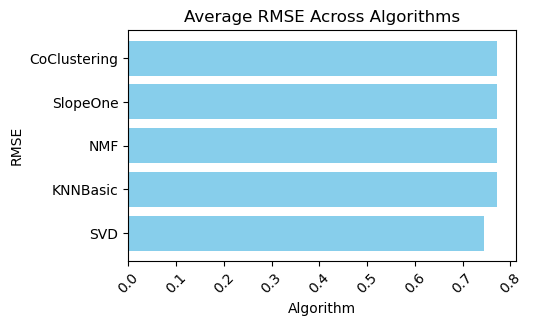

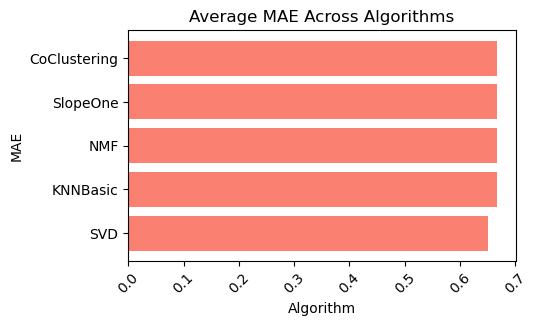

In [23]:
# Visualizing algorithm performance metrics
alg_names = [algo.__class__.__name__ for algo in algos]
rmse_scores = [cv_results['test_rmse'].mean() for cv_results in cv_results_list]
mae_scores = [cv_results['test_mae'].mean() for cv_results in cv_results_list]

plt.figure(figsize=(5, 3))
plt.barh(alg_names, rmse_scores, color='skyblue')
plt.title('Average RMSE Across Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 3))
plt.barh(alg_names, mae_scores, color='salmon')
plt.title('Average MAE Across Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()

In [25]:
# accuracy
trainset, testset = train_test_split(data_surprise, test_size=0.2, random_state=42)

for algo in algos:
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print accuracy
    acc = accuracy.rmse(predictions)
    print(f'\nAlgorithm: {algo.__class__.__name__}')
    print(f'Accuracy: {acc}')

RMSE: 0.7562

Algorithm: SVD
Accuracy: 0.7562133966403842
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7788

Algorithm: KNNBasic
Accuracy: 0.7787760917131951
RMSE: 0.7788

Algorithm: NMF
Accuracy: 0.7787760917131951
RMSE: 0.7788

Algorithm: SlopeOne
Accuracy: 0.7787760917131951
RMSE: 0.7788

Algorithm: CoClustering
Accuracy: 0.7787760917131951


# Item-Based Collaborative Filtering

In [ ]:
from surprise import KNNWithMeans

reader = Reader(rating_scale=(1, 5))  # Adjust the rating scale as needed
data_surpirse = Dataset.load_from_df(data[['user', 'item', 'ratings']], reader)

sim_options = {
    'name': 'cosine',  # you can use different similarity measures ('MSD', 'cosine', 'pearson')
    'user_based': False  # Compute similarities between items
}
algo = KNNWithMeans(sim_options=sim_options)

# Train on the full dataset or you can split the data into train and test sets
trainset = data_surpirse.build_full_trainset()
algo.fit(trainset)

# To predict the rating for a specific user and item
# user_id and item_id need to be raw id strings

predicted_rating = algo.predict(user_id, item_id).est
print(f"The predicted rating for user {user_id} on item {item_id} is: {predicted_rating}")

# Hybrid Recommender

In [ ]:
# Split the data into train and test sets
trainset, testset = train_test_split(data_surprise, test_size=0.2, random_state=42)

# Fit KNNBasic model
knn_basic = KNNBasic(sim_options={'user_based': False})
knn_basic.fit(trainset)

# Get the most popular items
popular_items = data['item'].value_counts().index.tolist()

# Define weights for each model
weight_knn = 0.7
weight_popularity = 0.3

# Hybrid recommender combining popularity and KNNBasic with weightage
def hybrid_recommend(user_id):
    # Collaborative filtering recommendations
    knn_recommendations = knn_basic.get_neighbors(trainset.to_inner_uid(user_id), k=3) # find the three nearest neighbors
    #trainset.to_inner_uid(user_id): converts the user_id from its raw ID to the inner ID used within the training dataset.
    knn_item_names = [trainset.to_raw_iid(inner_id) for inner_id in knn_recommendations] 
    #trainset.to_raw_iid(inner_id): The nearest neighbors' item IDs are then converted back from their inner IDs (used within the training set) to their raw item IDs
    
    # Combine with popular items and apply weights: collaborative filtering recommendations 
    hybrid_recommendations = knn_item_names[:2] + popular_items[:1]  # Taking top recommendations
    weighted_recommendations = [item for item in hybrid_recommendations for _ in range(int(len(hybrid_recommendations)/3))]
    
    return weighted_recommendations
